In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

In [35]:
n = 3
steps = 3

coin_qr = QuantumRegister(1)
pos_qr = QuantumRegister(n)
pos_cr = ClassicalRegister(n)
qc = QuantumCircuit(coin_qr, pos_qr, pos_cr)
for step in range(steps):
    qc.h(coin_qr)
    qc.cx(coin_qr, pos_qr[step])
qc.measure(pos_qr, pos_cr)

In [36]:
qc.depth()

7

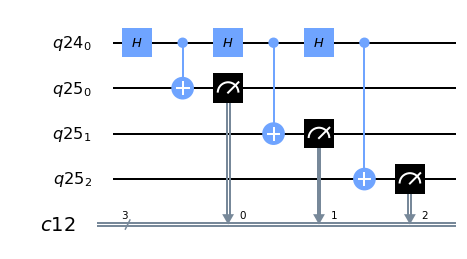

In [37]:
qc.draw(output="mpl")

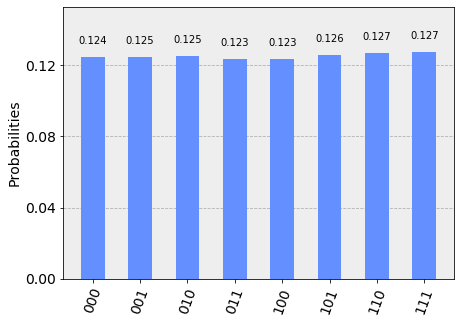

In [39]:
job = execute(qc, backend=BasicAer.get_backend("qasm_simulator"), shots=100000)
result = job.result()
plot_histogram(result.get_counts(qc))